In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

## Build a Basic Neural Network

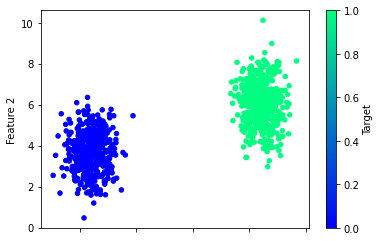

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Train and Test a Basic Neural Network

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 914us/step - loss: 0.6483 - accuracy: 0.9760
Epoch 2/100
24/24 [==============================] - 0s 873us/step - loss: 0.6398 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 831us/step - loss: 0.6304 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 859us/step - loss: 0.6203 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 914us/step - loss: 0.6094 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 873us/step - loss: 0.5977 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 831us/step - loss: 0.5854 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 748us/step - loss: 0.5724 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 790us/step - loss: 0.5590 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 831us/step - loss: 0.5453 - accura

24/24 [==============================] - 0s 794us/step - loss: 0.0995 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 830us/step - loss: 0.0978 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 830us/step - loss: 0.0962 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 799us/step - loss: 0.0946 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 792us/step - loss: 0.0930 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 795us/step - loss: 0.0915 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 820us/step - loss: 0.0900 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 748us/step - loss: 0.0885 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 790us/step - loss: 0.0871 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 832us/step - loss: 0.0857 - accuracy: 

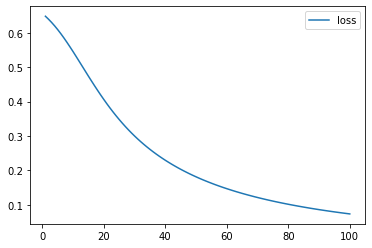

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

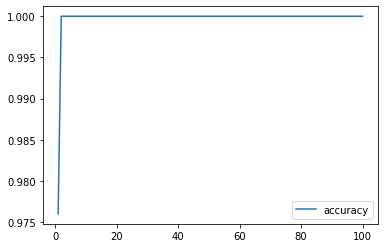

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0741 - accuracy: 1.0000
Loss: 0.07410503923892975, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## Nuances of Neural Networks on Nonlinear Numbers

####  Testing the limits of the basic neural network-- But what about nonlinear data?

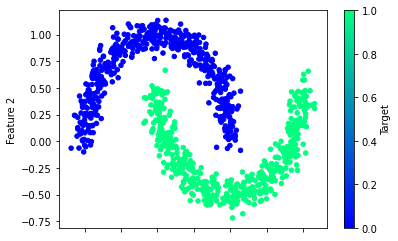

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0819 - accuracy: 0.4707
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9846 - accuracy: 0.4880
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9115 - accuracy: 0.5053
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8637 - accuracy: 0.5133
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8243 - accuracy: 0.5267
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.5347
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.5400
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7436 - accuracy: 0.5453
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7228 - accuracy: 0.5533
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7039 - accuracy: 0.5640
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.8480
Epoch 83/100
24/24 [==============================] - 0s 955us/step - loss: 0.3071 - accuracy: 0.8520
Epoch 84/100
24/24 [==============================] - 0s 881us/step - loss: 0.3052 - accuracy: 0.8547
Epoch 85/100
24/24 [==============================] - 0s 926us/step - loss: 0.3035 - accuracy: 0.8547
Epoch 86/100
24/24 [==============================] - 0s 952us/step - loss: 0.3019 - accuracy: 0.8560
Epoch 87/100
24/24 [==============================] - 0s 858us/step - loss: 0.3001 - accuracy: 0.8587
Epoch 88/100
24/24 [==============================] - 0s 914us/step - loss: 0.2986 - accuracy: 0.8587
Epoch 89/100
24/24 [==============================] - 0s 855us/step - loss: 0.2971 - accuracy: 0.8587
Epoch 90/100
24/24 [==============================] - 0s 903us/step - loss: 0.2956 - accuracy: 0.8653
Epoch 91/100
24/24 [==============================] - 0s 857us/step - loss: 0.2941 - accuracy: 0.

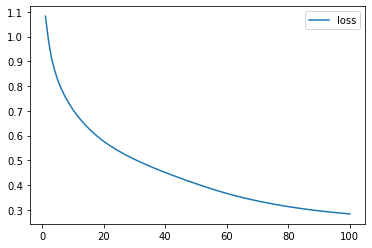

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

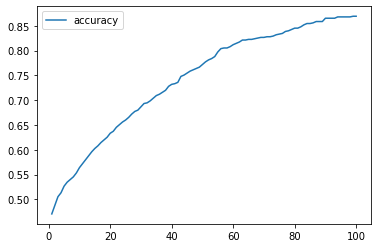

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

## Create the Connective Tissue, the Multiple-Neuron Neural Network

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 721us/step - loss: 0.5299 - accuracy: 0.8067
Epoch 2/100
24/24 [==============================] - 0s 706us/step - loss: 0.5060 - accuracy: 0.8107
Epoch 3/100
24/24 [==============================] - 0s 666us/step - loss: 0.4830 - accuracy: 0.8160
Epoch 4/100
24/24 [==============================] - 0s 719us/step - loss: 0.4622 - accuracy: 0.8187
Epoch 5/100
24/24 [==============================] - 0s 693us/step - loss: 0.4422 - accuracy: 0.8253
Epoch 6/100
24/24 [==============================] - 0s 748us/step - loss: 0.4237 - accuracy: 0.8320
Epoch 7/100
24/24 [==============================] - 0s 748us/step - loss: 0.4066 - accuracy: 0.8333
Epoch 8/100
24/24 [==============================] - 0s 665us/step - loss: 0.3907 - accuracy: 0.8373
Epoch 9/100
24/24 [==============================] - 0s 721us/step - loss: 0.3757 - accuracy: 0.8427
Epoch 10/100
24/24 [==============================] - 0s 725us/step - loss: 0.3625 - accura

24/24 [==============================] - 0s 621us/step - loss: 0.2203 - accuracy: 0.9120
Epoch 82/100
24/24 [==============================] - 0s 647us/step - loss: 0.2194 - accuracy: 0.9120
Epoch 83/100
24/24 [==============================] - 0s 541us/step - loss: 0.2184 - accuracy: 0.9120
Epoch 84/100
24/24 [==============================] - 0s 540us/step - loss: 0.2175 - accuracy: 0.9120
Epoch 85/100
24/24 [==============================] - 0s 541us/step - loss: 0.2168 - accuracy: 0.9133
Epoch 86/100
24/24 [==============================] - 0s 540us/step - loss: 0.2158 - accuracy: 0.9133
Epoch 87/100
24/24 [==============================] - 0s 656us/step - loss: 0.2149 - accuracy: 0.9133
Epoch 88/100
24/24 [==============================] - 0s 748us/step - loss: 0.2140 - accuracy: 0.9133
Epoch 89/100
24/24 [==============================] - 0s 746us/step - loss: 0.2131 - accuracy: 0.9133
Epoch 90/100
24/24 [==============================] - 0s 665us/step - loss: 0.2121 - accuracy: 

## Give Your Model a Synaptic Boost

## Practice Encoding Categorical Variables

In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("Resources/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Poland             4
Holland            4
Fiji               4
Dubai              3
Sweden             3
Sarawak            3
Finland            3
Estonia            2
Ghana              2
Nigeria            1
United States      1
Name: Country, dtype: int64

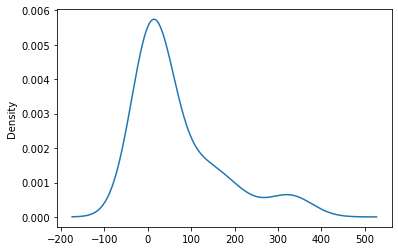

In [24]:
# Visualize the value counts
country_counts.plot.density()

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [26]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Span the Gap Using Standardization 19.3.4

In [28]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("Resources/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [29]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [30]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [31]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [32]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


## Real Data, Real Practice Imports and Setup 19.4.2

In [33]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('Resources/HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [34]:
#Generate a list of categorical variable names. Instead of searching across all 35 columns and keeping track of which variables need categorical preprocessing, we'll let Python do all of the heavy lifting. As an added bonus, we can use our variable list to perform the one-hot encoding once, rather than for each individual variable. To generate our variable list, we'll use Pandas Dataframe.dtypes property. Add and run the following code in your notebook:

# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

## Real Data, Real Practice Preprocessing 19.4.3

In [35]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)

encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [37]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [38]:
#To build our training and testing datasets, we need to separate two values:

#input values (which are our independent variables commonly referred to as model features or "X" in TensorFlow documentation (Links to an external site.))
#target output (our dependent variable commonly referred to as target or "y" in TensorFlow documentation)

# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [39]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Real Data, Real Practice Deep Learning Model Design 19.4.4

In [40]:
# To create our deep learning model, we must add and run the following code

# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Real Data, Real Practice Train and Evaluate the Model 19.4.5

In [42]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 0s 752us/step - loss: 786.2783 - accuracy: 0.8276
Epoch 2/100
35/35 [==============================] - 0s 727us/step - loss: 415.1277 - accuracy: 0.8276
Epoch 3/100
35/35 [==============================] - 0s 656us/step - loss: 163.2805 - accuracy: 0.8176
Epoch 4/100
35/35 [==============================] - 0s 693us/step - loss: 53.4623 - accuracy: 0.6370
Epoch 5/100
35/35 [==============================] - 0s 681us/step - loss: 28.5100 - accuracy: 0.4828
Epoch 6/100
35/35 [==============================] - 0s 696us/step - loss: 17.6479 - accuracy: 0.4247
Epoch 7/100
35/35 [==============================] - 0s 731us/step - loss: 12.4883 - accuracy: 0.3938
Epoch 8/100
35/35 [==============================] - 0s 678us/step - loss: 9.4418 - accuracy: 0.7568
Epoch 9/100
35/35 [==============================] - 0s 754us/step - loss: 7.4673 - accuracy: 0.8276
Epoch 10/100
35/35 [==============================] - 0s 612us/step - loss: 6.258

35/35 [==============================] - 0s 799us/step - loss: 0.4592 - accuracy: 0.8276
Epoch 81/100
35/35 [==============================] - 0s 712us/step - loss: 0.4591 - accuracy: 0.8276
Epoch 82/100
35/35 [==============================] - 0s 627us/step - loss: 0.4590 - accuracy: 0.8276
Epoch 83/100
35/35 [==============================] - 0s 684us/step - loss: 0.4589 - accuracy: 0.8276
Epoch 84/100
35/35 [==============================] - 0s 684us/step - loss: 0.4589 - accuracy: 0.8276
Epoch 85/100
35/35 [==============================] - 0s 630us/step - loss: 0.4588 - accuracy: 0.8276
Epoch 86/100
35/35 [==============================] - 0s 570us/step - loss: 0.4587 - accuracy: 0.8276
Epoch 87/100
35/35 [==============================] - 0s 541us/step - loss: 0.4586 - accuracy: 0.8276
Epoch 88/100
35/35 [==============================] - 0s 712us/step - loss: 0.4586 - accuracy: 0.8276
Epoch 89/100
35/35 [==============================] - 0s 655us/step - loss: 0.4585 - accuracy: 

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4114 - accuracy: 0.8723
Loss: 0.4114093482494354, Accuracy: 0.8722826242446899
